In [1]:
median_values = [0.625, 0.575, 1.228, 1.293, 1.407, 1.209, 1.127] #values coming from applying 7 times Step III of the uq_yilmaz_methodology, and assumed to be lognormally distributed.

In [2]:
import numpy as np

In [3]:
median_values_array = np.array(median_values)
median_values_array_sorted = np.sort(median_values_array) #https://www.statisticshowto.com/normal-probability-plot/
median_values_array_sorted = np.expand_dims(median_values_array_sorted, 1)
print(median_values_array_sorted.shape)
print(median_values_array_sorted)

(7, 1)
[[0.575]
 [0.625]
 [1.127]
 [1.209]
 [1.228]
 [1.293]
 [1.407]]


In [4]:
no_samples = len(median_values_array_sorted)
print(no_samples)

7


In [5]:
rank_order_number = np.arange(1, no_samples+1, 1, dtype=int) #https://realpython.com/how-to-use-numpy-arange/
print(rank_order_number)

[1 2 3 4 5 6 7]


In [6]:
rank_values_matrix = np.column_stack([rank_order_number, median_values_array_sorted])
print(rank_values_matrix)

[[1.    0.575]
 [2.    0.625]
 [3.    1.127]
 [4.    1.209]
 [5.    1.228]
 [6.    1.293]
 [7.    1.407]]


In [7]:
f = []

In [8]:
for i in range(no_samples+1):
    f.append((i-0.375)/(no_samples+0.25)) #https://sixsigmastudyguide.com/normal-probability-plot/
    fi = f[1:] #https://stackoverflow.com/questions/13732025/get-array-elements-from-index-to-end

In [9]:
print(fi)

[0.08620689655172414, 0.22413793103448276, 0.3620689655172414, 0.5, 0.6379310344827587, 0.7758620689655172, 0.9137931034482759]


In [10]:
rank_values_frequency_matrix = np.column_stack([rank_order_number, median_values_array_sorted, fi])
print(rank_values_frequency_matrix)

[[1.         0.575      0.0862069 ]
 [2.         0.625      0.22413793]
 [3.         1.127      0.36206897]
 [4.         1.209      0.5       ]
 [5.         1.228      0.63793103]
 [6.         1.293      0.77586207]
 [7.         1.407      0.9137931 ]]


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'cumulative frequency')

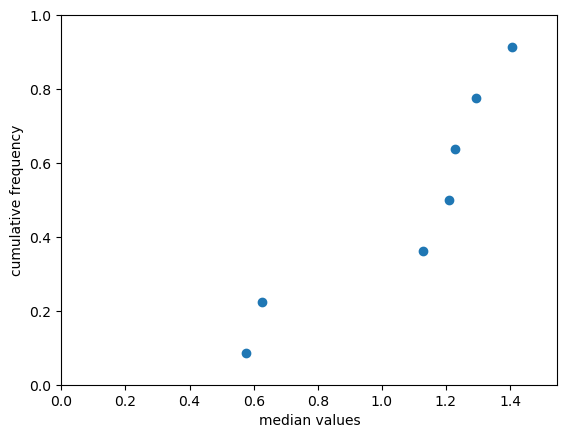

In [12]:
plt.scatter(rank_values_frequency_matrix[:,1], rank_values_frequency_matrix[:,2])
plt.xlim([0,1.1*np.max(median_values)])
plt.ylim([0,1])
plt.xlabel('median values')
plt.ylabel('cumulative frequency')

Building the lognormal probability paper

In [13]:
from scipy import stats

In [14]:
z_values = stats.norm.ppf(fi) #values double checked with https://onlinestatbook.com/2/calculators/inverse_normal_dist.html
#https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p
#https://stackoverflow.com/questions/55859695/lognorm-inv-function-of-excel-in-python-scipy
print(z_values)
print(z_values.shape)
print(type(z_values))

[-1.36448875 -0.75829256 -0.35293399  0.          0.35293399  0.75829256
  1.36448875]
(7,)
<class 'numpy.ndarray'>


In [15]:
mean_median_values = np.mean(median_values_array_sorted)
std_median_values = np.std(median_values_array_sorted)

print(mean_median_values, std_median_values)

1.0662857142857143 0.30561073012469137


In [16]:
log_median_values_array_sorted = np.log(median_values_array_sorted)

Text(0, 0.5, 'random variable ln(median)')

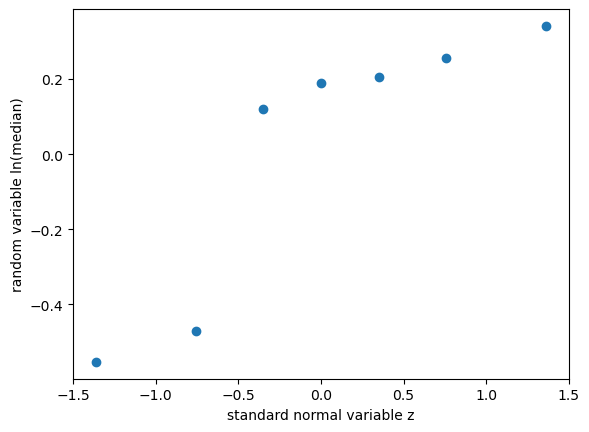

In [17]:
plt.scatter(z_values, log_median_values_array_sorted)
plt.xlabel('standard normal variable z')
plt.ylabel('random variable ln(median)')

In [18]:
first_quartile_probability = 0.25
z_first_quartile = stats.norm.ppf(first_quartile_probability)

third_quartile_probability = 0.75
z_third_quartile = stats.norm.ppf(third_quartile_probability)

In [19]:
print(z_first_quartile, z_third_quartile)

-0.6744897501960817 0.6744897501960817


In [20]:
import math

In [21]:
mean_log_median_values = np.mean(log_median_values_array_sorted)
std_log_median_values = np.std(log_median_values_array_sorted)

print('mean_log_median_values: ', mean_log_median_values, 'std_log_median_values: ', std_log_median_values)

mean_log_median_values:  0.012825092415242243 std_log_median_values:  0.338296753777331


In [22]:
random_variable_first_quartile = mean_log_median_values + std_log_median_values * z_first_quartile #be careful to pass the logarithm of mean of median values and the 
random_variable_third_quartile = mean_log_median_values + std_log_median_values * z_third_quartile

In [23]:
print('rv for first quartile: ', random_variable_first_quartile, 'rv for third quartile: ', random_variable_third_quartile)

rv for first quartile:  -0.2153526005321751 rv for third quartile:  0.24100278536265957


In [24]:
#https://stackoverflow.com/questions/21565994/method-to-return-the-equation-of-a-straight-line-given-two-points
from numpy import ones, vstack
from numpy.linalg import lstsq

points = [(z_first_quartile, random_variable_first_quartile), (z_third_quartile, random_variable_third_quartile)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m,q = lstsq(A, y_coords)[0]
print("Line solution is y = {m}x + {q}".format(m=m, q=q))

Line solution is y = 0.33829675377733104x + 0.012825092415242234


C:\Users\fn20944\AppData\Local\Temp\ipykernel_26320\128641107.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,q = lstsq(A, y_coords)[0]


In [25]:
straight_line_x_values = np.linspace(np.min(z_values), np.max(z_values), 100)
straight_line_y_values = m * straight_line_x_values + q

(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

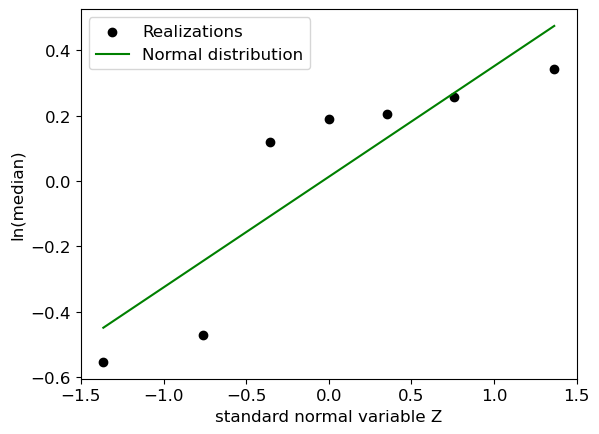

In [26]:
plt.scatter(z_values, log_median_values_array_sorted, color='k')
plt.xlabel('standard normal variable Z', fontsize=12)
plt.ylabel('ln(median)', fontsize=12)

plt.plot(straight_line_x_values, straight_line_y_values, color='g')

legend = ['Realizations', 'Normal distribution']
plt.legend(legend, fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

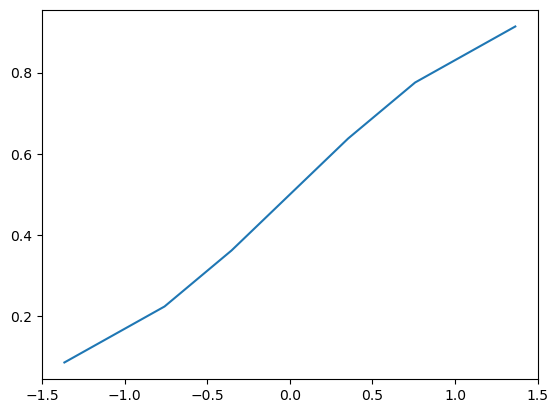

In [27]:
#https://www.statology.org/normal-cdf-in-python/
y = stats.norm.cdf(z_values)
plt.plot(z_values, y)

In [28]:
ax1_list = list(z_values)
ay1_list = list(log_median_values_array_sorted)

In [29]:
ax2_list = list(y * 100)
ay2_list = len(list(y))*[1]

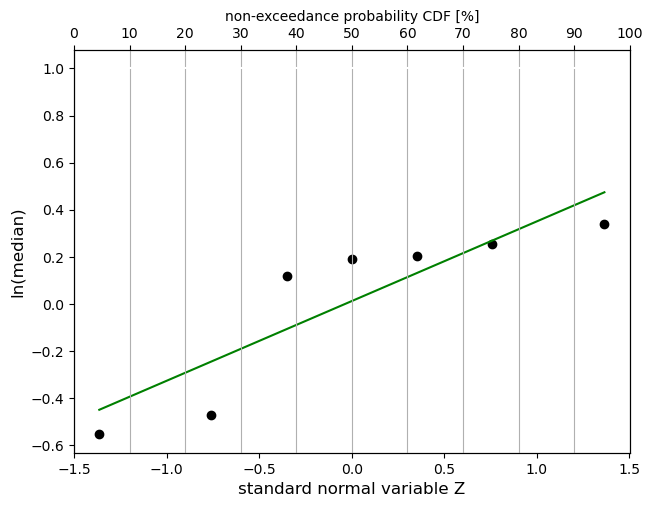

In [30]:
fig, ax1 = plt.subplots()
lns1 = ax1.scatter(ax1_list, ay1_list, color = 'k', label = 'Realizations')

lns2 = ax1.plot(straight_line_x_values, straight_line_y_values, color='g', label='Normal distribution')

ax2 = ax1.twiny()

lns3 = ax2.plot(ax2_list, ay2_list, color = 'white') #fake y line

fig.tight_layout()

ax1.set_xlabel('standard normal variable Z', fontsize=12)
ax1.set_ylabel('ln(median)', fontsize=12)

ax2.set_xlabel('non-exceedance probability CDF [%]')

# ax1.set_xlim([-1.5, 1.5])
# ax1.set_ylim([-2.00, 0])

ax2.set_xlim([0, 100])
ax2.set_xticks(np.arange(0, 110, 10), fontsize=12)

ax2.grid() #https://www.w3schools.com/python/matplotlib_grid.asp

#in case of the second axis below the first one, look at https://stackoverflow.com/questions/31803817/how-to-add-second-x-axis-at-the-bottom-of-the-first-one-in-matplotlib
plt.show() #to state at the end of all plot options

Definining the confidence interval

In [31]:
from scipy import stats

In [32]:
confidence_interval = 0.90
confidence = 0.90 + 0.05

In [33]:
zeta_alpha = stats.norm.ppf(confidence)
print('zeta_90_confidence: ', zeta_alpha)

zeta_90_confidence:  1.6448536269514733


In [34]:
variance_log_median_values = math.pow(std_log_median_values,2)

In [35]:
ln_lower_bound = mean_log_median_values - zeta_alpha * math.pow(variance_log_median_values/no_samples,1/2)
ln_upper_bound = mean_log_median_values + zeta_alpha * math.pow(variance_log_median_values/no_samples,1/2)

In [36]:
print("ln lower bound: ", ln_lower_bound, "ln upper bound: ", ln_upper_bound)

ln lower bound:  -0.1974927254799892 ln upper bound:  0.22314291031047367


In [37]:
lower_bound = math.exp(ln_lower_bound)
upper_bound = math.exp(ln_upper_bound)

In [38]:
print("lower bound: ", lower_bound, "upper bound: ", upper_bound)

lower bound:  0.8207861114309996 upper bound:  1.2499991987455867


Does the estimated confidence interval contain the sample mean?

In [39]:
mean_median_values

1.0662857142857143